<a href="https://colab.research.google.com/github/vivekanand1234/Hotel-Reservation/blob/main/Hotel_reservation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

**Importing Data and Libraries**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
# Loading The Data
path = "/content/drive/MyDrive/Hotel Reservation (EDA)-  Vivek anand/Hotel Bookings.csv"
df = pd.read_csv(path)
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt
# To show all the columns which were not read.
pd.set_option('display.max_columns', None)

**Data expolaration**

To Look for errors, Data type and missing Values in the DataSet.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


Data Cleaning

From Hotel Booking CSV file we saw that there are many missing values in the Dataset, The Country column was Partially filled, The company column was half filled and the Agent column too had missing values. There were columns which were needed in Boolean format. So we Perform Data Cleaning to get rid of these errors. 

In [ ]:
# Changing the int values of is_canceled to object data type.
df['is_canceled']= df['is_canceled'].replace([0,1],['not_cancelled','cancelled'])

In [ ]:
# Changing the int values of is_repeated_guest to object data type.
df['is_repeated_guest']=df['is_repeated_guest'].replace([0,1],['No','Yes'])

In [ ]:
# Filling the null values in country column.
df['country'].fillna(method='ffill',inplace=True)

In [ ]:
# Filling the null values in agent with the 0 because booking through wouldn't involve an agent.
df['agent'].fillna(value=0,inplace=True)

In [ ]:
# Filling the null values in children with 0.
df['children'].fillna(value=0,inplace=True)

In [ ]:
# Filling the null values in agent with the 0 because booking through wouldn't involve an company.
df['company'].fillna(value=0,inplace=True)

In [ ]:
# Checking for Null values.
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

**The probability of cancelation**

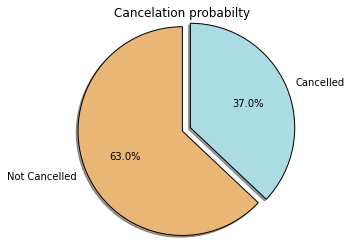

In [ ]:
# probablity of canelation
Cancelation_probability = df['is_canceled'].value_counts()
label = ['Not Cancelled','Cancelled']
color = ['#eab676','#abdbe3']
explode = [0,0.1]
plt.pie(Cancelation_probability, labels = label, colors=color, wedgeprops={'edgecolor': 'black'}, explode=explode ,shadow =True, radius = 1.2, startangle= 90, autopct = '%1.1f%%')
plt.title("Cancelation probabilty")
sb.set(rc = {'figure.figsize':(15,9)})
plt.show()

**INFERENCE**

> According to the data set the probability of a booking to cancelled is 37%.



**Lead time Analysis**

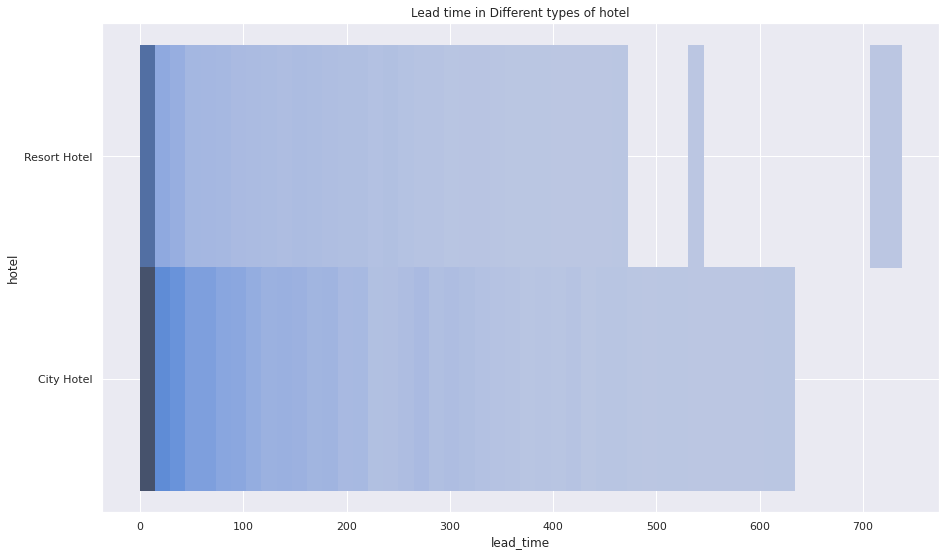

In [ ]:
sb.histplot(data = df, x ='lead_time',kde = True, bins= 50, y = 'hotel', element='poly')
sb.set(rc = {'figure.figsize':(20,12)})
plt.title('Lead time in Different types of hotel')
plt.show()

**INFERENCE**

> Most of the booking happen within An Hour of time of checkin regardless of the type of hotel. But different trends can be observed from the plot like, in Resorts The lead time is mostly within a few hours of checkin but there are Bookings with a lead time of 700 hrs or 30-31 days. which is not been observed in City Hotels having a maximum lead time of 630hrs or around 25 days.



**Pobability of having a repeated Guest In Different Type of Hotels.**

City Hotel

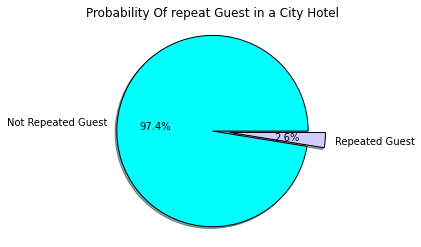

In [ ]:
df_city = df.loc[df['hotel'] == 'City Hotel']
Repeat_probability_C = df_city['is_repeated_guest'].value_counts()
label = ['Not Repeated Guest','Repeated Guest']
color = ['#00FFFF','#CCCCFF']
explode = [0,0.2]
plt.pie(Repeat_probability_C, labels = label, colors=color, wedgeprops={'edgecolor': 'black'}, explode=explode ,shadow =True, radius = 1.1, autopct = '%1.1f%%')
plt.title("Probability Of repeat Guest in a City Hotel")
sb.set(rc = {'figure.figsize':(15,9)})
plt.show()

**INFERENCE**

> The probablity of City hotel of having a repeated guest is 2.6%, rest ever other guest they cater is a new guest.



**Resorts**

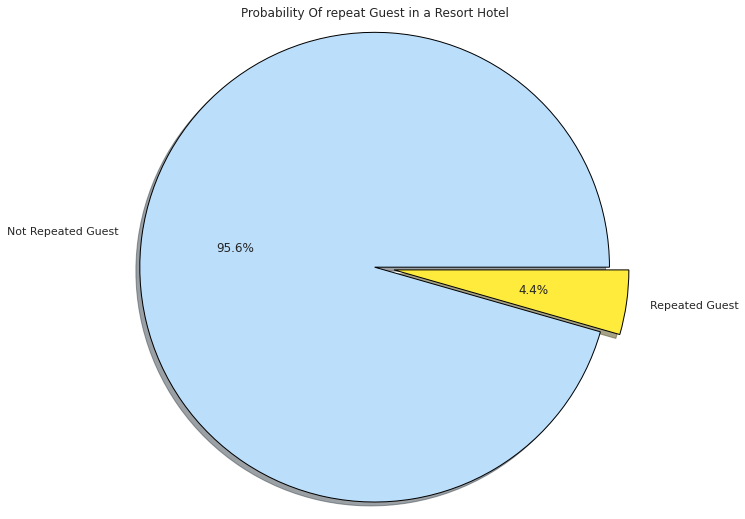

In [ ]:
df_city = df.loc[df['hotel'] == 'Resort Hotel']
Repeat_probability_R = df_city['is_repeated_guest'].value_counts()
label = ['Not Repeated Guest','Repeated Guest']
color = ['#BBDEFB','#FFEB3B']
explode = [0,0.1]
plt.pie(Repeat_probability_R, labels = label, colors=color, wedgeprops={'edgecolor': 'black'}, explode = explode ,shadow =True, radius = 1.2, autopct = '%1.1f%%')
plt.title("Probability Of repeat Guest in a Resort Hotel")
sb.set(rc = {'figure.figsize':(20,12)})
plt.show()

**INFERENCE**

> The probablity of Resorts of having a repeated guest is 4.4%, rest ever other guest they cater is a new guest.



Probability of guest coming back.

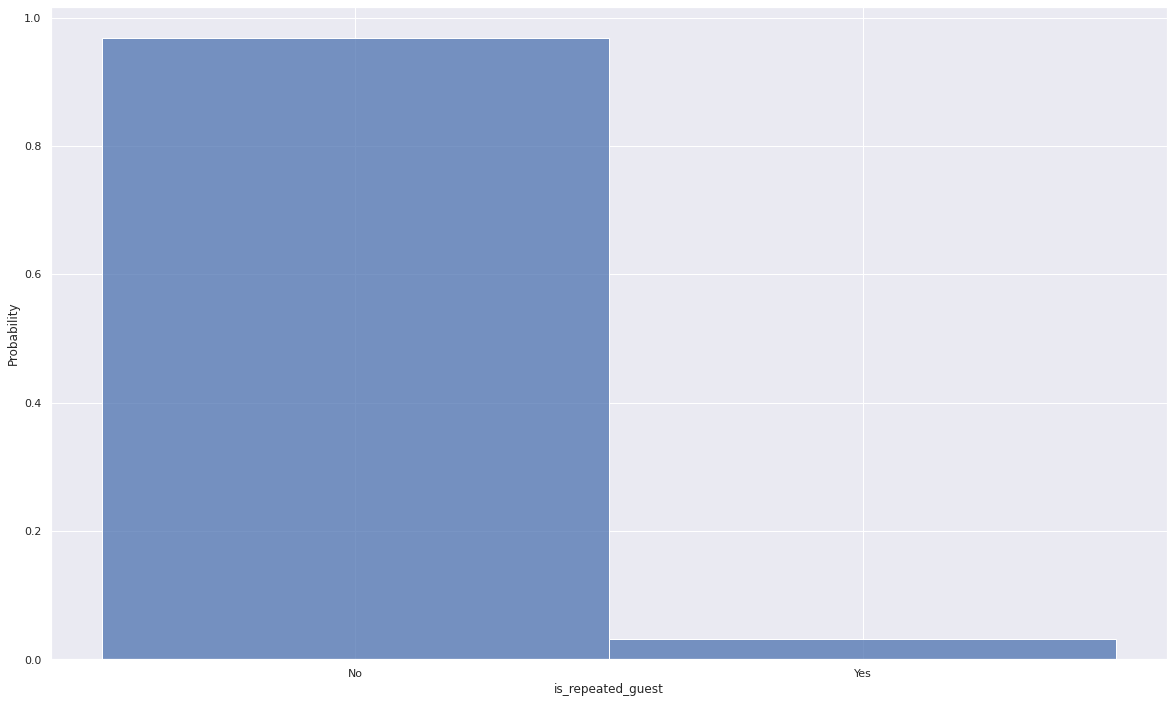

In [ ]:
sb.histplot(data = df, x = 'is_repeated_guest',stat='probability')
sb.set(rc = {'figure.figsize':(20,12)})
plt.show()

**INFERENCE**
> The chances of having a guest to come back regardless of the hotel type is 3.2%




**Have you ever wondered when the best time of year to book a hotel room is?**

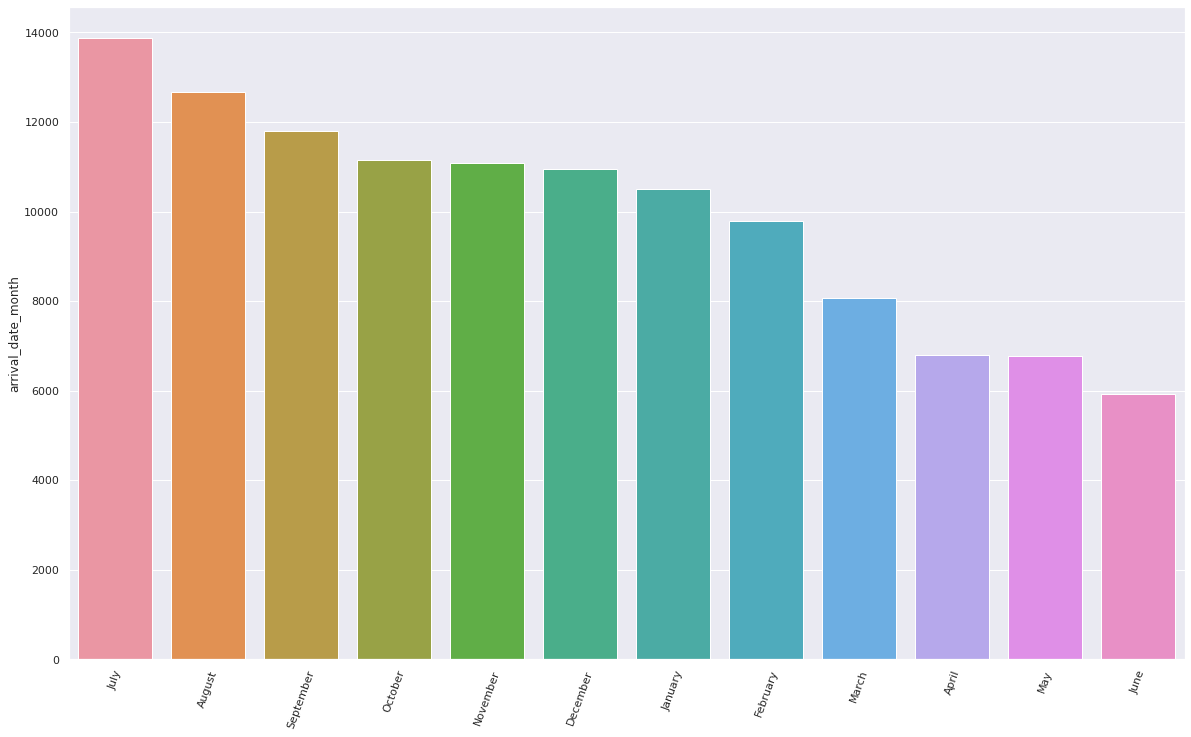

In [ ]:
sb.barplot(x = df["arrival_date_month"].unique(), y = df["arrival_date_month"].value_counts());
sb.set(rc = {'figure.figsize':(20,12)})
plt.xticks(rotation=70);

**Yearly Inference**

July is the most demanded month of the year. Interestingly, number of bookings decreased over year and June, the month before July, is the least demanded one. So, June is the best month of the year to go on holidays. But when it is recommended?

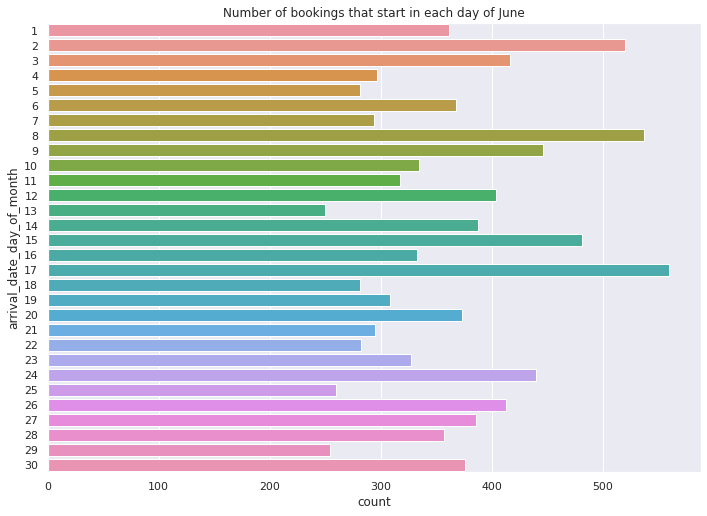

In [ ]:
June_month_df = df[df.arrival_date_month == "June"]
sb.countplot(y=June_month_df.arrival_date_day_of_month);
plt.gcf().set_size_inches(11.7, 8.27)
plt.title("Number of bookings that start in each day of June");
sb.set(rc = {'figure.figsize':(20,12)})

**Monthly Inference**

 In this graph, it is clear that the second half of the year is least demanded.

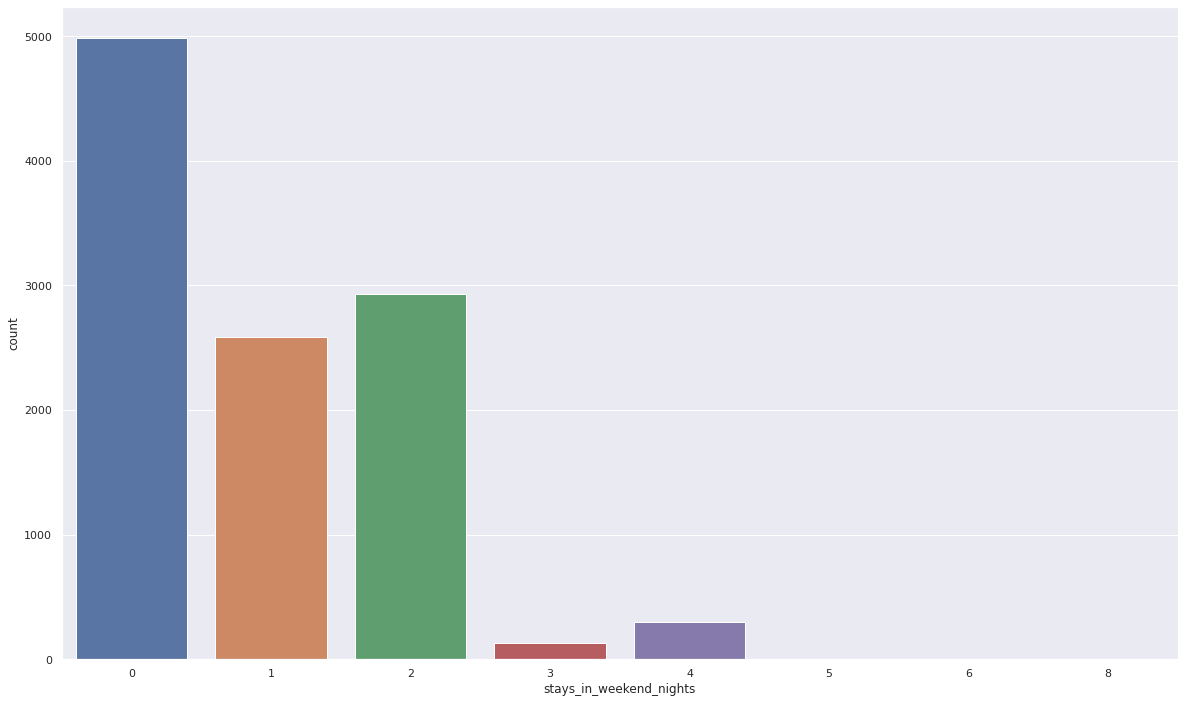

In [ ]:
second_half_June_df = June_month_df[June_month_df.arrival_date_day_of_month > 15]
sb.countplot(x=June_month_df.stays_in_weekend_nights);
sb.set(rc = {'figure.figsize':(15,6)})

**Weekend Inference**

More than the half of bookings in the second half of June include weekends. In other word, weekdays are the best option to go on holidays in June.

**Type of accomodation**

The dataset is based on two different types of hotel: Resort hotel and city hotel.

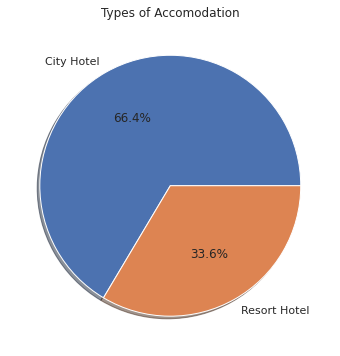

In [ ]:
accomodation = df["hotel"].value_counts()
plt.title("Types of Accomodation")
plt.pie(accomodation, labels = accomodation.index, autopct='%1.1f%%', shadow =True);
sb.set(rc = {'figure.figsize':(15,9)})

**INFERECE**


> Acording to the Pie chart out of all the Hotels from different countries. the can be classified as City Hotels and Resorts with City Hotels having a lions share of 66.4%



**Number of bookings over time**

This dataset only contains data for three years.

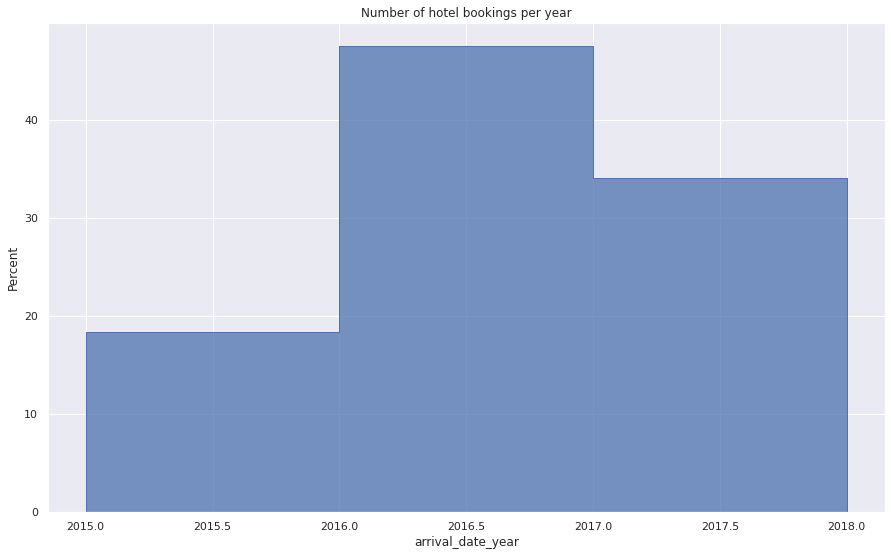

In [ ]:

plt.title("Number of hotel bookings per year")
sb.histplot(data=df,x ='arrival_date_year',bins=np.arange(2015, 2019, 1), element= 'step', stat='percent')
sb.set(rc = {'figure.figsize':(20,12)})

**INFERENCE**

> 2016 has been a booming year for the Hotel industry with 47% of the guests of the year 2015 to 2018 being catered in 2016 only, followed up by 2017 with 34% and 2015 with 19%.



**Analysis of the percentage of people preferring different types of deposit while hotel booking**

The dataset is based on three different types of deposit: No Deposit, Refundable, Non Refund

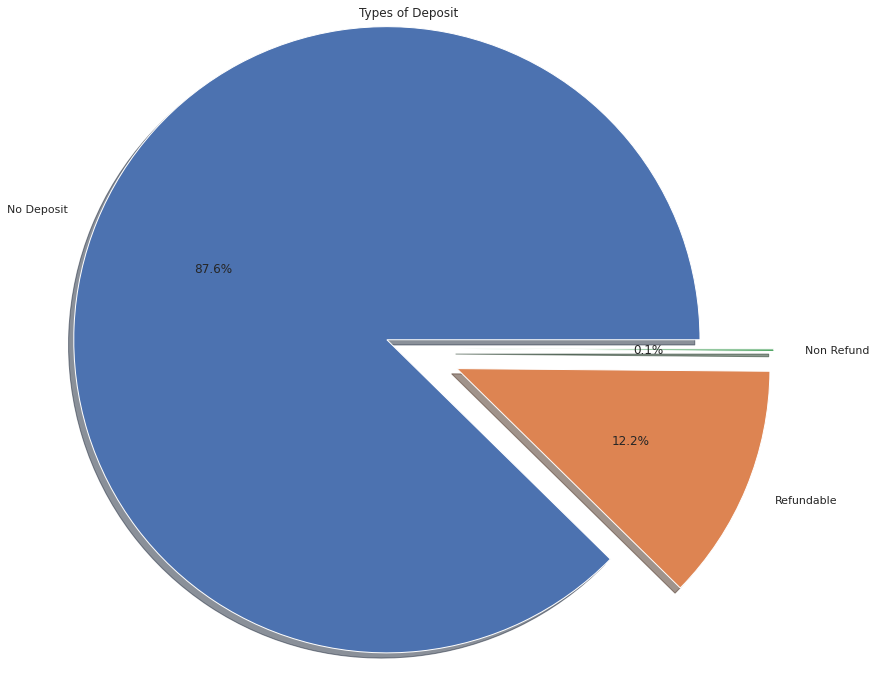

In [ ]:
Deposit = df["deposit_type"].value_counts()
x= ['No Deposit', 'Refundable', 'Non Refund']
plt.title("Types of Deposit")
plt.pie(Deposit,labels=x, radius=1.2,autopct='%1.1f%%',shadow=True,explode=[.09,.2,.2])
sb.set(rc = {'figure.figsize':(15,9)})
plt.show()

**INFERENCE**  

> Accoding to the Pie Chart 87.2% of people opted for the no deposit,12.3% people went for a deposit of which 99% got their refund back.


**Persentage of opting different ways of bookings**

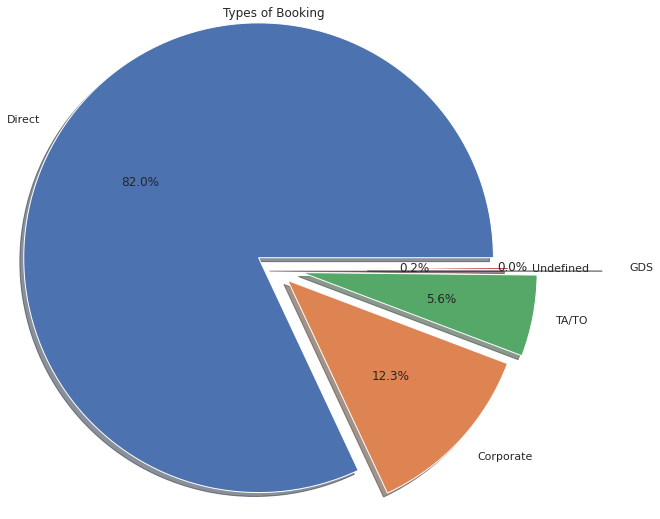

In [ ]:
Booking = df["distribution_channel"].value_counts()
x= ['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS']
plt.title("Types of Booking")
plt.pie(Booking,labels=x, radius=1.2,autopct='%1.1f%%',shadow=True,explode=[.09,.1,.15,0,.5])
sb.set(rc = {'figure.figsize':(15,9)})
plt.show()

**INFERENCE** 

> Accoding to the Pie Chart 82% of people opted for the direct method,12.3% went through Corporate, 5.6% through TA/TO, 0.2% through GDS and 0.0% with undefined ways.



**Summary**


> 

1.   The Probability of Cancelation is 37%.
2.   Most of the bookings are done within an hour of check-in with Resorts having the most lead time of 31 days.
3. The Probability of having a returning guest in City hotel is 2.6% and in Resorts 4.4% is and overall its 3.2%.
4. July is the most desirable month for vacations followed by the months in ascending order with june being the least desirable. 
5. There are two types of hotels City Hotels and Resorts with City Hotels being 66.4% of them.
6. 2016 has seen the most guests since 2015 to 2018.
7. 87.6% of people opt for no deposit with 12.3% giving deposit and 99% of them getting it back.
8. Direct Method is the Most common Way of booking the rooms(82%) followed by corporate at 12.3% and TA/TO at 5.6%.





**Conclusion**


> This Analysis was in the Hotel Reservation Data, in which we found many things which can help the Hospitality industry. the first being that more than 1/3 of the bookings they receive have the chances of being cancelled. people like to book for a room just hours before the check-in date but there are people who do book 25-30 Days before hand too. July is the most attractive month for tourism which loses its charm over time with June being the least attractive.
almost entirety (87.6%) of the guest will go for no deposit and most (82%) of the people prefer booking directly through the hotel itself. 

